In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Downloading Data


In [66]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-08 03:20:31--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: 'car_fuel_efficiency.csv.1'

     0K .......... .......... .......... .......... ..........  5%  365K 2s
    50K .......... .......... .......... .......... .......... 11% 1.99M 1s
   100K .......... .......... .......... .......... .......... 17%  743K 1s
   150K .......... .......... .......... .......... .......... 23%  619K 1s
   200K .......... .......... .......... .......... .......... 29% 1.51M 1s
   250K .......... .......... .......... .......... .......... 35%  948K 1s
   300K .......... .......... .......... .......... .......... 40%  637K 1s
   350K

#### Importing date

In [67]:

df = pd.read_csv("car_fuel_efficiency.csv")

In [68]:
df.head(3)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [102]:
columns = df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [104]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

num_cylinders
[ 3.  5. nan  4.  1.]
14

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

acceleration
[17.7 17.8 15.1 20.2 14.4]
162

model_year
[2003 2007 2018 2009 2008]
24

origin
['Europe' 'USA' 'Asia']
3

fuel_type
['Gasoline' 'Diesel']
2

drivetrain
['All-wheel drive' 'Front-wheel drive']
2

num_doors
[ 0.  2. -1.  1. nan]
9

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



In [70]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [71]:
df['horsepower'].median()

np.float64(149.0)

#### Splitting the data

In [72]:
n = len(df)
n_val= int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_val)

In [73]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [74]:
idx = np.arange(n)

In [75]:
np.random.seed(42)
np.random.shuffle(idx)

In [76]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [77]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [78]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [79]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [80]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [81]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

#### Model 

In [82]:
df_train.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors'],
      dtype='object')

In [83]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [84]:
df_train.isnull().sum()

engine_displacement      0
num_cylinders          307
horsepower             429
vehicle_weight           0
acceleration           551
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              289
dtype: int64

#### Using 0 to fill the nulls


In [85]:
df_train['horsepower'] = df_train['horsepower'].fillna(0)

In [86]:
X_train = df_train[base]

In [87]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [88]:
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [89]:
w0

np.float64(3.664666247254423)

In [90]:
w

array([ 2.14827083e-06,  2.21209296e-04, -3.23460699e-04,  1.64673231e-05])

<Axes: ylabel='Count'>

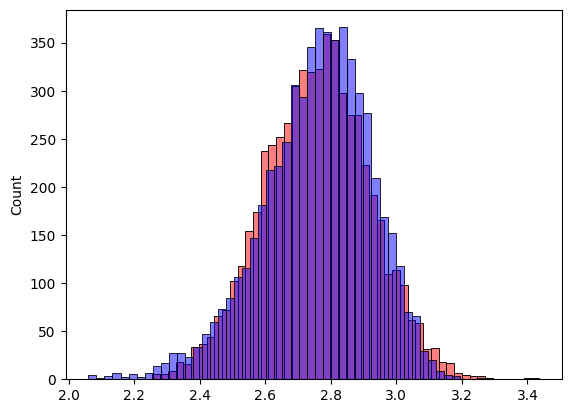

In [91]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [92]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [93]:
rmse(y_train, y_pred)

np.float64(0.0390863253926525)

#### Using the mean

In [94]:
mean = df_train['horsepower'].mean()

In [95]:
df_train['horsepower'] = df_train['horsepower'].fillna(mean)

In [96]:
X_train = df_train[base]

In [97]:
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [98]:
w0

np.float64(3.664666247254423)

In [99]:
w

array([ 2.14827083e-06,  2.21209296e-04, -3.23460699e-04,  1.64673231e-05])

<Axes: ylabel='Count'>

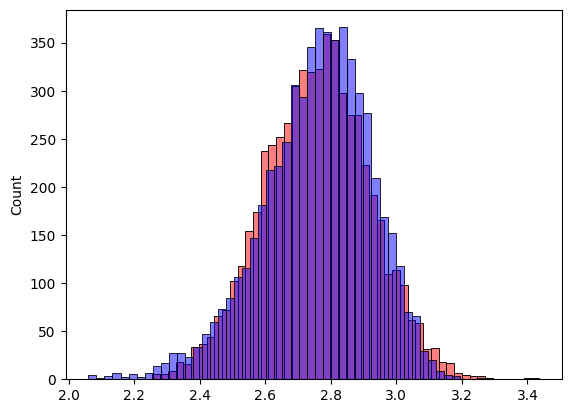

In [100]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [101]:
rmse(y_train, y_pred)

np.float64(0.0390863253926525)